# Import necessary dependencies and settings

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

AttributeError: module 'numpy' has no attribute 'ndarray'

# Sample corpus of text documents

In [ ]:
corpus = ['El cielo es azul y luminoso.',
          '¡Me encanta este cielo azul y luminoso!',
          'El zorro marrón es rápido y salta sobre el perro que es dormilón.',
          'Un desayuno real tiene salchichas, jamón, bacon, huevos, tostadas y queso',
          '¡Me encanta el jamón, los huevos, las salchichas y el bacon!',
          '¡El zorro marrón es rápido, y el perro azul es un dormilón!',
          'El cielo es azul intenso y hoy está muy luminoso',
          '¡El perro es un dormilón, pero el zorro es mu rápido!'
]
labels = ['tiempo', 'tiempo', 'animales', 'alimentos', 'alimentos', 'animales', 'tiempo', 'animales']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Documento': corpus,
                           'Categoria': labels}) 
corpus_df = corpus_df[['Documento', 'Categoria']]

corpus_df

# Simple text pre-processing

In [ ]:
import nltk
nltk.download('stopwords') #tener cuidado con las stopwords
####
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('spanish')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [ ]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

# Bag of Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.) #si ves la palabra 4 veces cuentamela, sino no (ver los hiperparametros)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

In [7]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 2)	1
  (0, 0)	1
  (0, 11)	1
  (1, 2)	1
  (1, 0)	1
  (1, 11)	1
  (1, 5)	1
  (2, 21)	1
  (2, 12)	1
  (2, 17)	1
  (2, 19)	1
  (2, 14)	1
  (2, 4)	1
  (3, 3)	1
  (3, 16)	1
  (3, 18)	1
  (3, 10)	1
  (3, 1)	1
  (3, 8)	1
  (3, 20)	1
  (3, 15)	1
  (4, 5)	1
  (4, 18)	1
  (4, 10)	1
  (4, 1)	1
  (4, 8)	1
  (5, 0)	1
  (5, 21)	1
  (5, 12)	1
  (5, 17)	1
  (5, 14)	1
  (5, 4)	1
  (6, 2)	1
  (6, 0)	1
  (6, 11)	1
  (6, 9)	1
  (6, 7)	1
  (6, 6)	1
  (7, 21)	1
  (7, 17)	1
  (7, 14)	1
  (7, 4)	1
  (7, 13)	1


In [8]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]])

In [9]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,azul,bacon,cielo,desayuno,dormiln,encanta,est,hoy,huevos,intenso,...,marrn,mu,perro,queso,real,rpido,salchichas,salta,tostadas,zorro
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
3,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
6,1,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1


# Bag of N-Grams Model

In [10]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,azul dormiln,azul intenso,azul luminoso,bacon huevos,cielo azul,desayuno real,dormiln zorro,encanta cielo,encanta jamn,est luminoso,...,perro dormiln,real salchichas,rpido perro,rpido salta,salchichas bacon,salchichas jamn,salta perro,tostadas queso,zorro marrn,zorro mu
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# TF-IDF Model

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,azul,bacon,cielo,desayuno,dormiln,encanta,est,hoy,huevos,intenso,...,marrn,mu,perro,queso,real,rpido,salchichas,salta,tostadas,zorro
0,0.53,0.00,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.43,0.00,0.49,0.00,0.00,0.57,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.37,0.00,0.00,0.00,0.00,0.00,...,0.43,0.00,0.37,0.00,0.00,0.37,0.00,0.51,0.00,0.37
3,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.00,0.32,0.00,...,0.00,0.00,0.00,0.38,0.38,0.00,0.32,0.00,0.38,0.00
4,0.00,0.45,0.00,0.00,0.00,0.45,0.00,0.00,0.45,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00
5,0.35,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,...,0.47,0.00,0.40,0.00,0.00,0.40,0.00,0.00,0.00,0.40
6,0.30,0.00,0.34,0.00,0.00,0.00,0.47,0.47,0.00,0.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,...,0.00,0.57,0.41,0.00,0.00,0.41,0.00,0.00,0.00,0.41


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,azul,bacon,cielo,desayuno,dormiln,encanta,est,hoy,huevos,intenso,...,marrn,mu,perro,queso,real,rpido,salchichas,salta,tostadas,zorro
0,0.53,0.00,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.43,0.00,0.49,0.00,0.00,0.57,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.37,0.00,0.00,0.00,0.00,0.00,...,0.43,0.00,0.37,0.00,0.00,0.37,0.00,0.51,0.00,0.37
3,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.00,0.32,0.00,...,0.00,0.00,0.00,0.38,0.38,0.00,0.32,0.00,0.38,0.00
4,0.00,0.45,0.00,0.00,0.00,0.45,0.00,0.00,0.45,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00
5,0.35,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,...,0.47,0.00,0.40,0.00,0.00,0.40,0.00,0.00,0.00,0.40
6,0.30,0.00,0.34,0.00,0.00,0.00,0.47,0.47,0.00,0.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,...,0.00,0.57,0.41,0.00,0.00,0.41,0.00,0.00,0.00,0.41


# Document Similarity

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix) #calculamos el coseno sobre la matriz creada arriba
similarity_df = pd.DataFrame(similarity_matrix) #luego la matriz la convierto en un dataframe
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.186878,0.570570,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.255585,0.153352,0.468209,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.802385,0.000000,0.610765
3,0.000000,0.000000,0.000000,1.000000,0.574516,0.000000,0.000000,0.000000
4,0.000000,0.255585,0.000000,0.574516,1.000000,0.000000,0.000000,0.000000
5,0.186878,0.153352,0.802385,0.000000,0.000000,1.000000,0.106627,0.665444
6,0.570570,0.468209,0.000000,0.000000,0.000000,0.106627,1.000000,0.000000
7,0.000000,0.000000,0.610765,0.000000,0.000000,0.665444,0.000000,1.000000


## Clustering documents using similarity features

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,0.0,1.0,0.375892,2.0
1,2.0,5.0,0.388462,2.0
2,7.0,9.0,0.62005,3.0
3,3.0,4.0,0.653756,2.0
4,6.0,8.0,0.8658,3.0
5,11.0,12.0,2.514951,5.0
6,10.0,13.0,3.070778,8.0


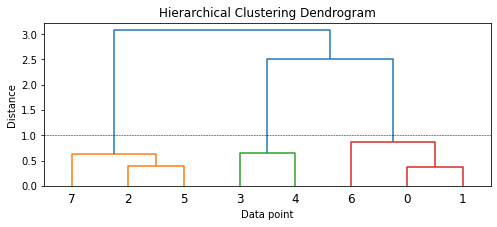

In [15]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [16]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Documento,Categoria,ClusterLabel
0,El cielo es azul y luminoso.,tiempo,3
1,¡Me encanta este cielo azul y luminoso!,tiempo,3
2,El zorro marrón es rápido y salta sobre el perro que es dormilón.,animales,1
3,"Un desayuno real tiene salchichas, jamón, bacon, huevos, tostadas y queso",alimentos,2
4,"¡Me encanta el jamón, los huevos, las salchichas y el bacon!",alimentos,2
5,"¡El zorro marrón es rápido, y el perro azul es un dormilón!",animales,1
6,El cielo es azul intenso y hoy está muy luminoso,tiempo,3
7,"¡El perro es un dormilón, pero el zorro es mu rápido!",animales,1
